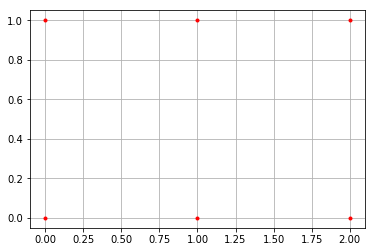

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 1, 2], [0, 1, 2]])
y = np.array([[0, 0, 0], [1, 1, 1]])
plt.plot(x, y, color='red', marker='.', linestyle='')
plt.grid(True)
plt.show()

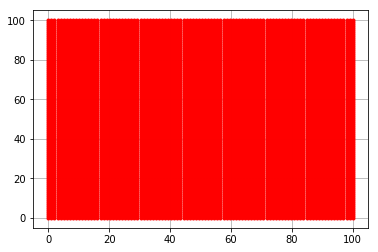

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

X, Y = np.meshgrid(x, y)
plt.plot(X, Y, color='red', marker='.', linestyle='')
plt.grid(True)
plt.show()

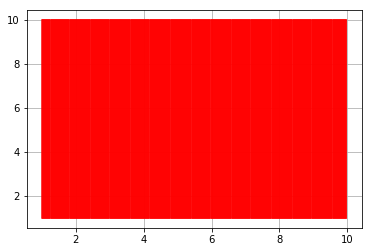

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 10, 0.02)
y = np.arange(1, 10, 0.02)

X, Y = np.meshgrid(x, y)
plt.plot(X, Y, color='red')
plt.grid(True)
plt.show()

In [78]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X_train, y_train, X_test, y_test, classifier):
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))
    # 随机选择所有的
    markers = ('s', 'x', 'o', '^', 'v')
    # 随机选择所有的
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 每个类别的颜色还有marker
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([XX.ravel(), YY.ravel()]).T)
    Z = z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha=0.3, cmap=cmap)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    
    for i, c in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train==c, 0],
                    y=X_train[y_train==c, 1],
                    alpha=0.8,
                    c=colors[i],
                    marker=markers[i],
                    label=c,
                    edgecolor='black')
    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidths=1,
                marker='o',
                s=100,
                label='test set')
    plt.xlabel('petal lenght [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [54]:
import pandas as pd
df = pd.read_csv('./wine.data', header=None)
X, y = df.iloc[:, 1:3].values, df.iloc[:, 0].values

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

(105, 2) (45, 2) (105,) (45,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

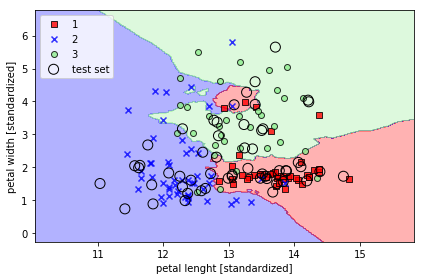

In [79]:
plot_decision_regions(X_train, y_train, X_test, y_test, knc)

score:  0.9555555555555556


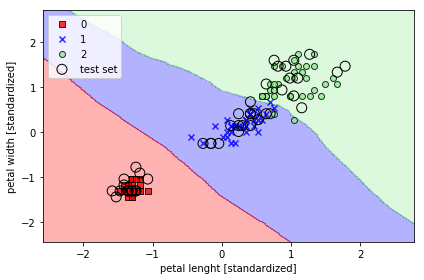

In [91]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_std, y_train)
print('score: ', knc.score(X_test_std, y_test))
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, knc)